In [1]:
pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/1f/c1/b75fad123110f7e845feb4f2f9d64dd652ff9f44e9fcca5b09ef06ee4372/holidays-0.71-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/a4/ed/1f1afb2e9e7f38a545d628f864d562a5ae64fe6f7a10e28ffb9b185b4e89/importlib_resources-6.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed0

In [2]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv('AirPassengers.csv')
df.head(5)
df=df.rename(columns={'#Passengers': 'y', 'Month':'ds'})

In [4]:
df.tail(5)

,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
df['y_org']=df['y']
print(df.head(5))

        ds    y  y_org
0  1949-01  112    112
1  1949-02  118    118
2  1949-03  132    132
3  1949-04  129    129
4  1949-05  121    121


In [11]:
# to save a copy of the original data..you'll see why shortly.
df['y']=np.log(df['y'])

In [10]:
import notebook
print(notebook.__version__)

6.5.4


In [12]:
df.head(5)

,ds,y,y_org
0,1949-01,4.718499,112
1,1949-02,4.770685,118
2,1949-03,4.882802,132
3,1949-04,4.859812,129
4,1949-05,4.795791,121


In [13]:
model=Prophet() #instantiate prophet
model.add_country_holidays(country_name='US')
model.fit(df)

# train_test_split: df: train/test, then run the code for train, compare the predict vs test.

15:24:44 - cmdstanpy - INFO - Chain [1] start processing
15:24:45 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
'''   {'year':'A',
        'quarter':'Q',
        'month':'M',
        'day':'D',
        'hour':'H',
        'minute':'T',
        'second';'S',
        'millisecond':'L',
        'microsecond':'U',
        'nanosecond':'N'}
'''
# future_data=model.make_future_dataframe(periods=6, freq='H')
future_data=model.make_future_dataframe(periods=12, freq='M')

In [18]:
forecast_data=model.predict(future_data)

In [19]:
forecast_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Armistice Day,Armistice Day_lower,Armistice Day_upper,Armistice Day (observed),...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
151,1961-07-31,6.277239,6.434862,6.530948,6.263563,6.290411,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.206789,0.206789,0.206789,0.0,0.0,0.0,6.484027
152,1961-08-31,6.286286,6.317581,6.408959,6.269399,6.303097,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.074566,0.074566,0.074566,0.0,0.0,0.0,6.360852
153,1961-09-30,6.295041,6.155561,6.256640,6.274560,6.315021,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.089704,-0.089704,-0.089704,0.0,0.0,0.0,6.205338
154,1961-10-31,6.304089,6.020543,6.120850,6.279874,6.327029,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.233558,-0.233558,-0.233558,0.0,0.0,0.0,6.070531
155,1961-11-30,6.312844,6.160614,6.261157,6.286294,6.339592,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.101630,-0.101630,-0.101630,0.0,0.0,0.0,6.211214


In [20]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
151,1961-07-31,6.484027,6.434862,6.530948
152,1961-08-31,6.360852,6.317581,6.408959
153,1961-09-30,6.205338,6.155561,6.256640
154,1961-10-31,6.070531,6.020543,6.120850
155,1961-11-30,6.211214,6.160614,6.261157


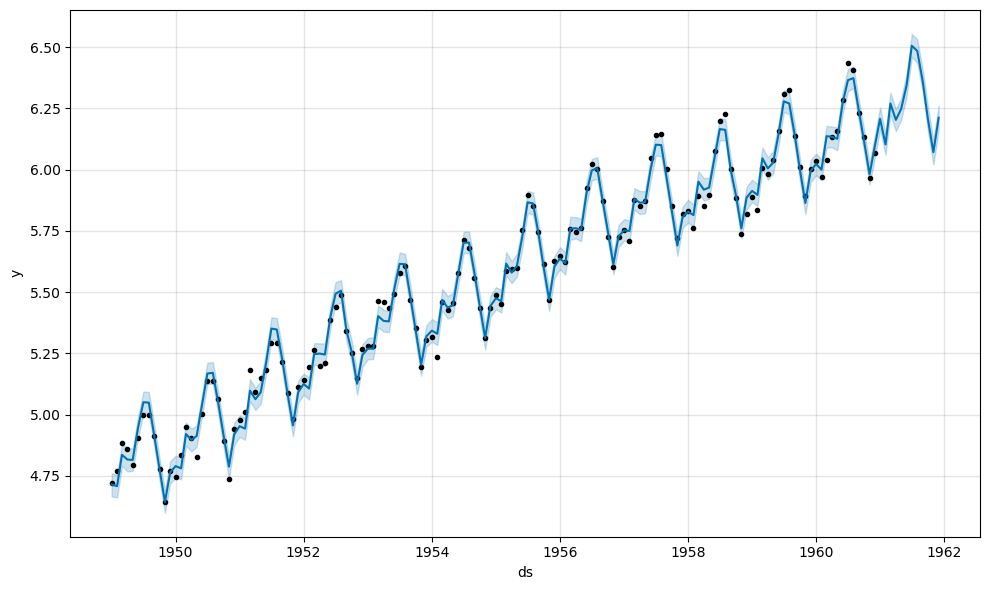

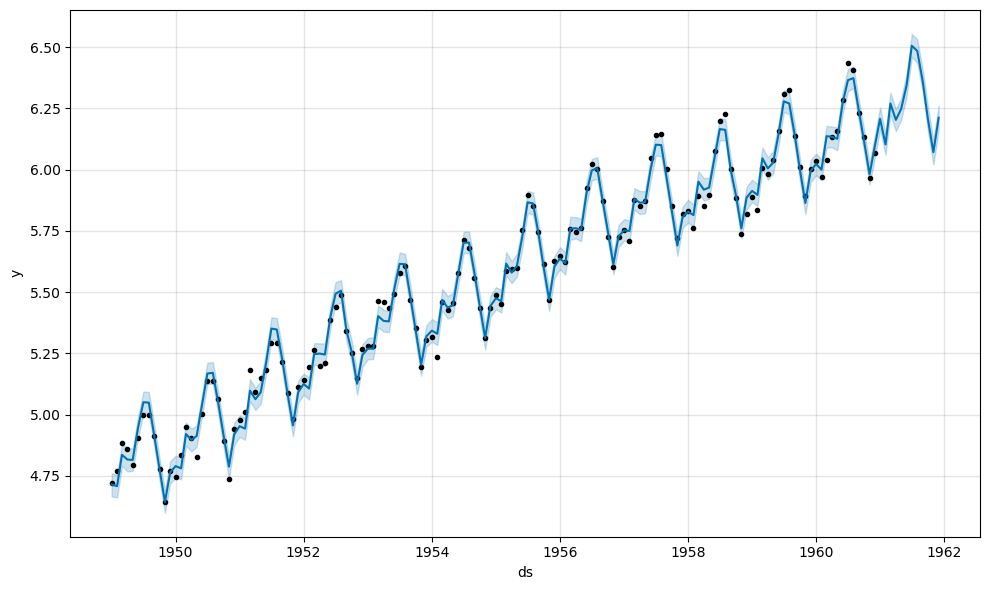

In [22]:
model.plot(forecast_data)

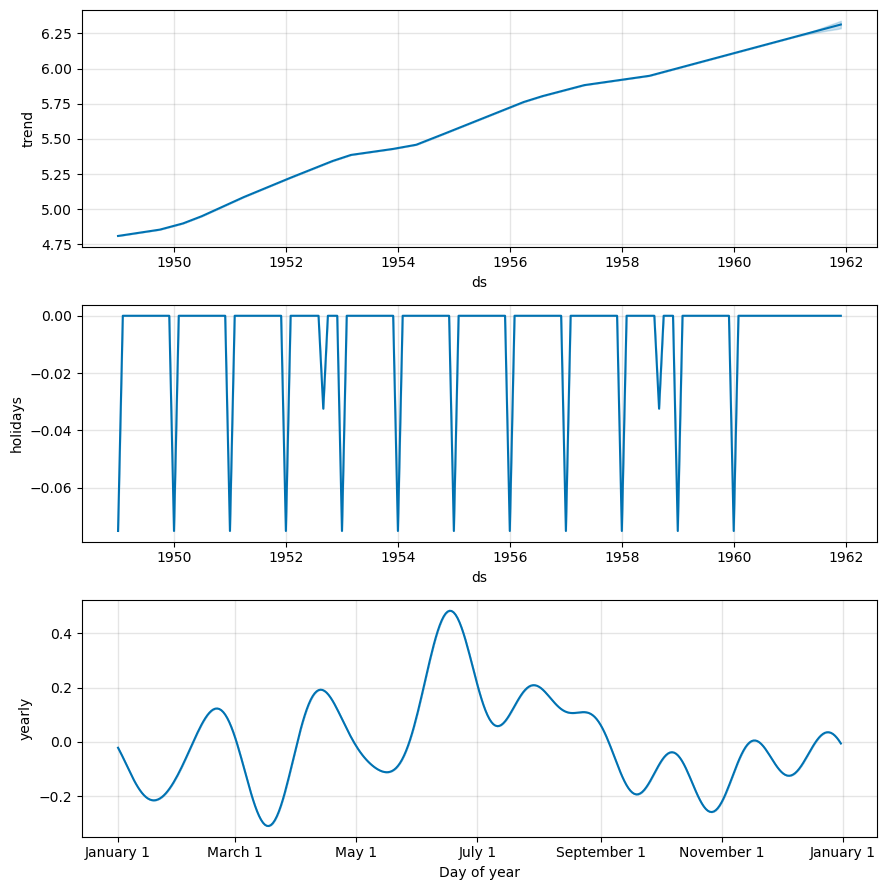

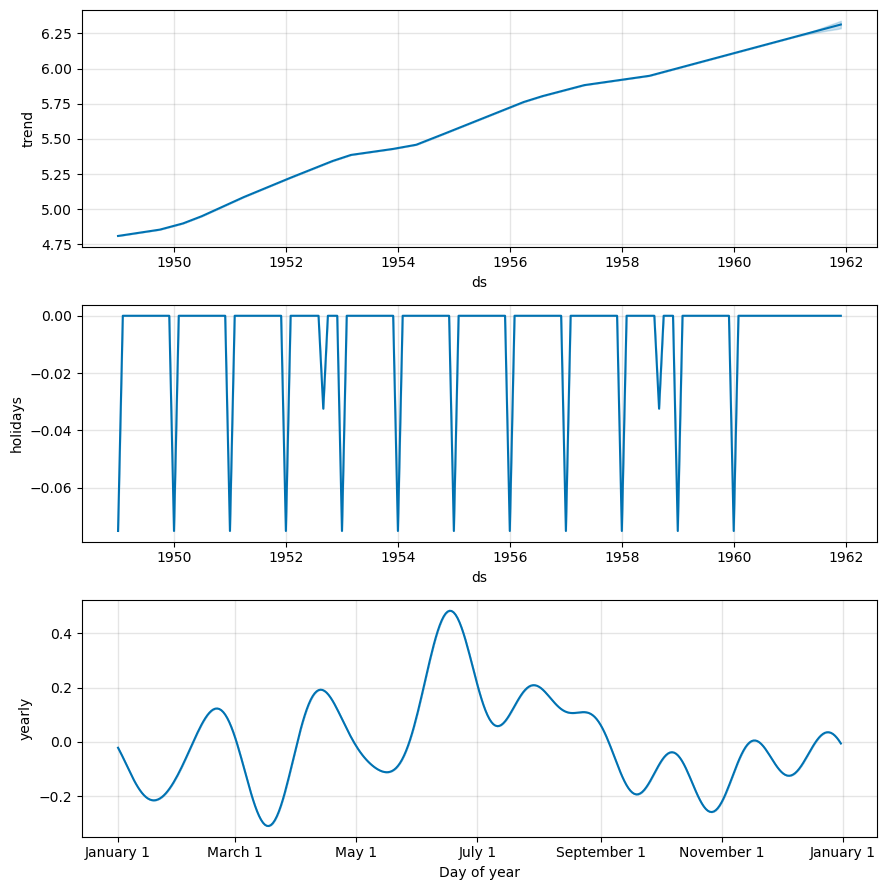

In [23]:
model.plot_components(forecast_data)

In [25]:
forecast_data_orig=forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat']=np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower']=np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper']=np.exp(forecast_data_orig['yhat_upper'])

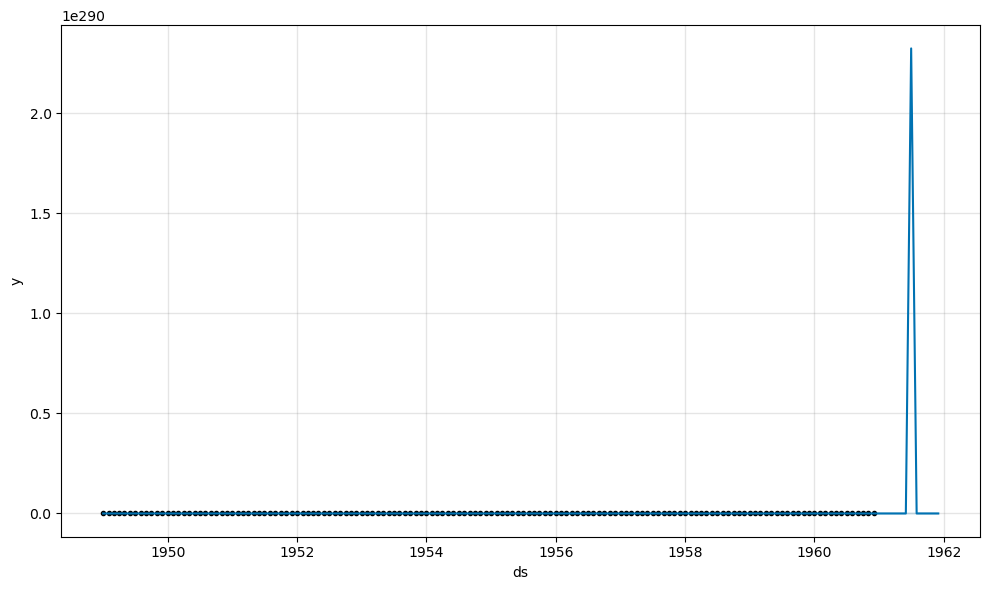

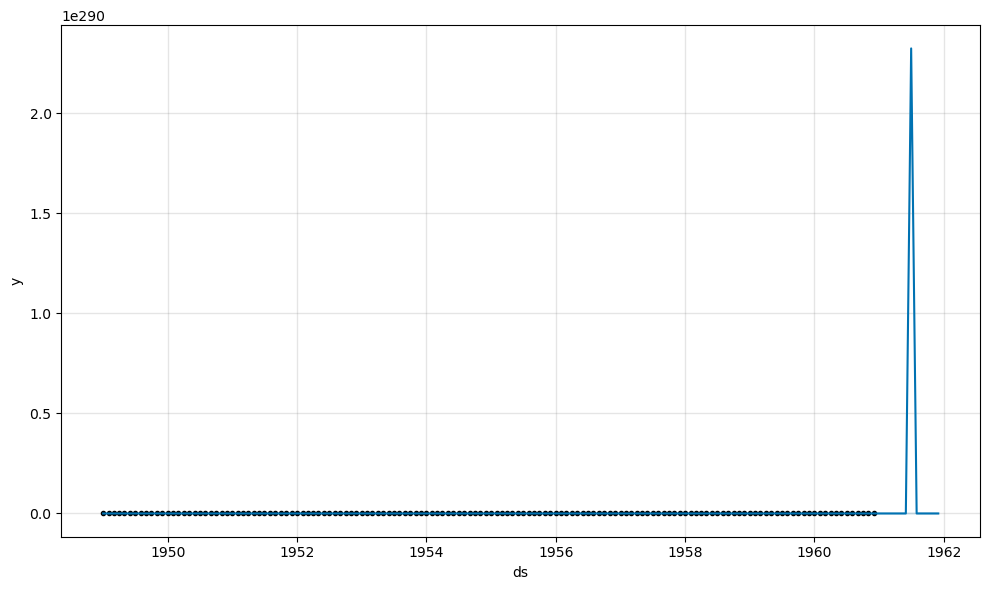

In [26]:
model.plot(forecast_data_orig)